Nama : Kurniawan Eko Putra\
Kelas : Instrumentasi 5A\
NPT : 41.21.0015

## Dimensionality Reduction dengan PCA

### Import Library

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import missingno as msno

### Loading and Exploring the Data

In [31]:
data = pd.read_csv('input/iris.csv')
x = data.iloc[:, [0, 1, 2, 3]].values
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Analisis Data Univariate


Analisis Data Eksploratif Univariat (Univariate EDA) adalah langkah penting dalam proses analisis data, di mana fokusnya adalah untuk memeriksa dan merangkum karakteristik dari satu variabel. Tujuannya adalah untuk memahami distribusi, kecenderungan pusat, dispersi, dan properti kunci lain dari variabel tersebut. 

In [33]:
data.species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

#### Mencari Missing Value pada Dataset

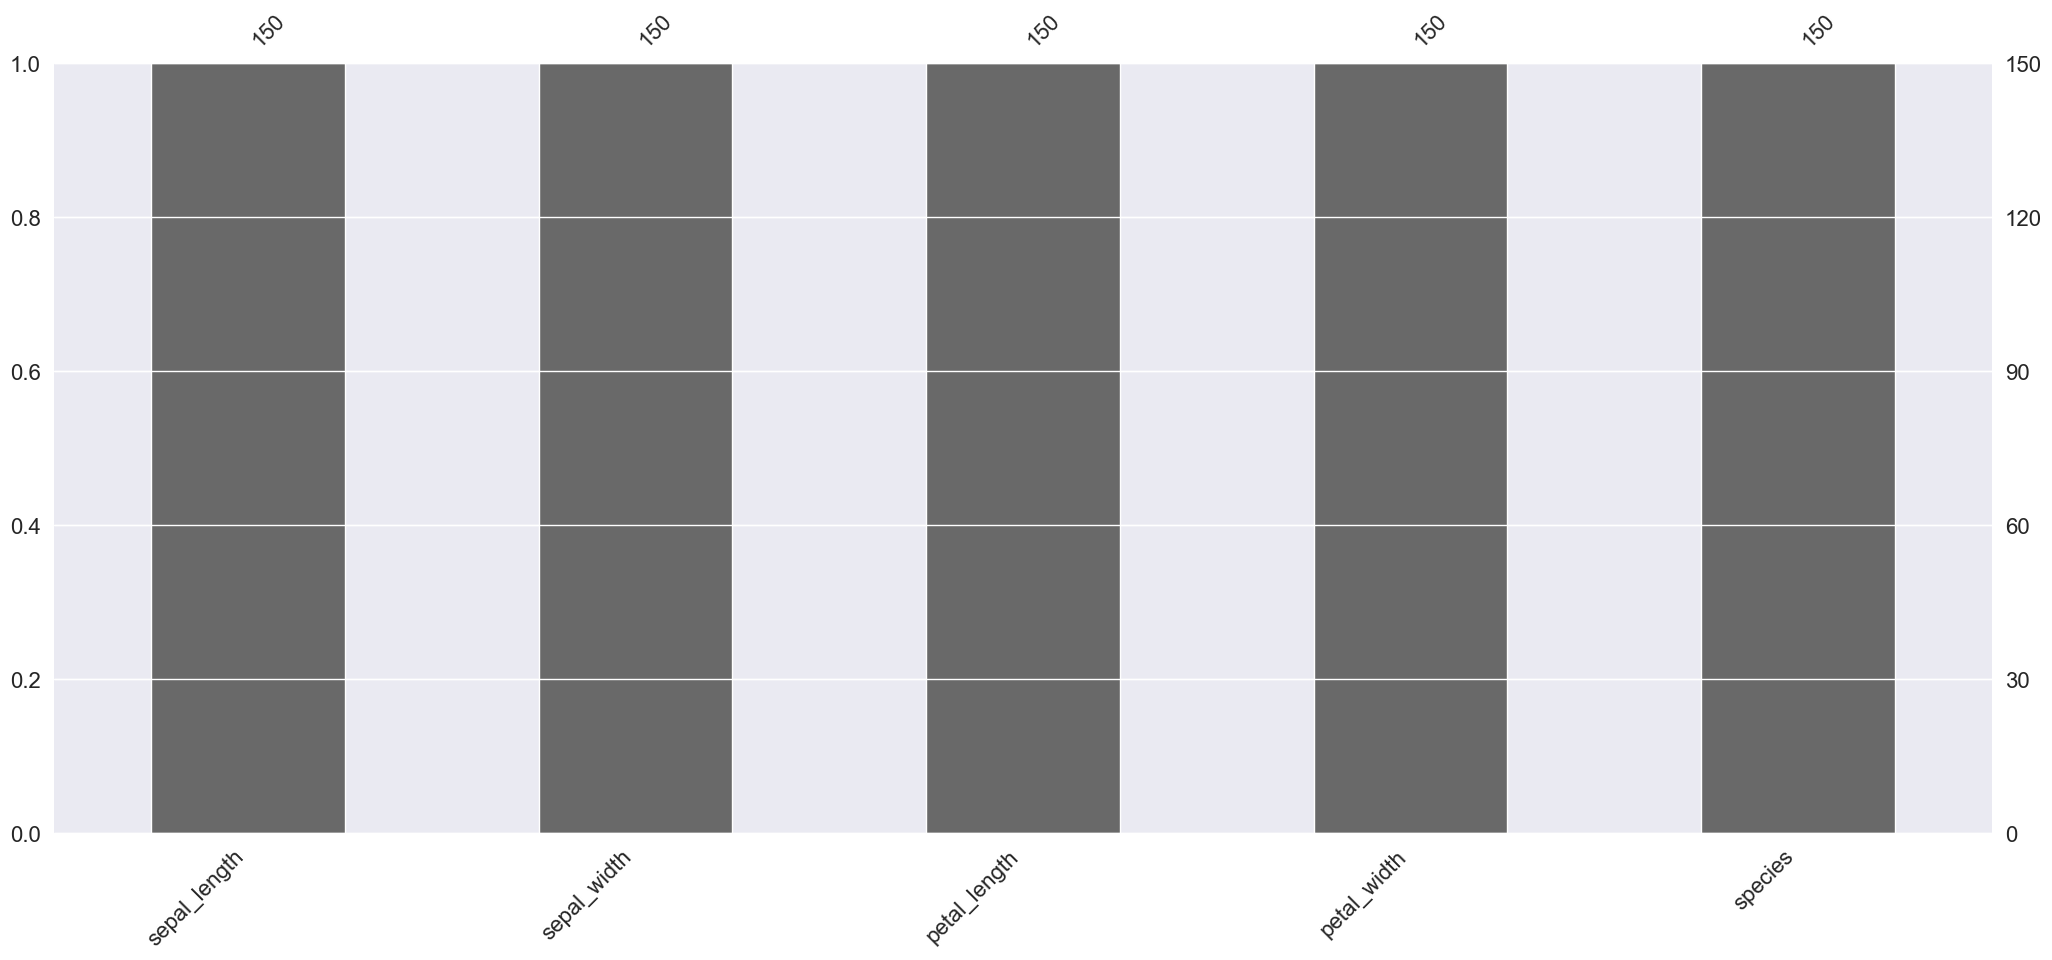

In [34]:
p=msno.bar(data)

msno.bar(data) digunakan untuk membuat diagram batang yang menunjukkan pola kehadiran dan ketiadaan data (missing values) dalam dataset data. Beberapa informasi yang dapat diperoleh dari diagram batang ini termasuk:

- Panjang Batang: Merepresentasikan jumlah total entri atau baris dalam dataset.\
- Bagian yang Terisi (Berwarna): Menunjukkan bagian dari setiap baris yang memiliki data yang tidak hilang.\
- Bagian yang Kosong (Berwarna Putih): Menunjukkan bagian dari setiap baris yang memiliki nilai yang hilang atau kosong.\

#### Membuat Count Plot

Count plot digunakan untuk menghitung frekuensi setiap kategori pada variabel kategorikal. Pada contoh ini, variabel target "Species" dari dataset iris digunakan sebagai sumbu y. Sehingga, plot ini akan menunjukkan jumlah frekuensi setiap kelas (setiap spesies iris) dalam dataset.

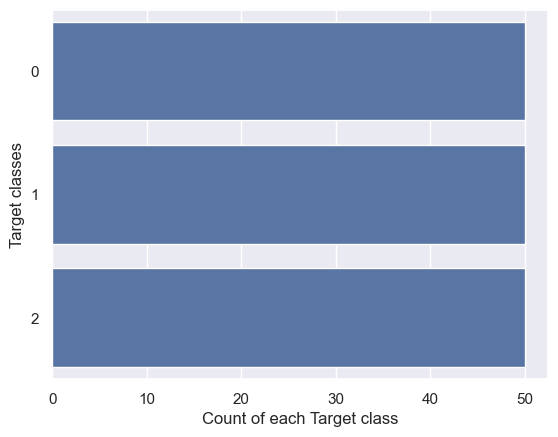

In [35]:
sns.countplot(y=data.species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

Berdasarkan data dari plot di atas, dapat diketahui :
- Ada 150 baris data pada dataset
- Ada 4 fitur atau variabel yang berperan sebagai faktor utama
- Terdapat tiga kelas target unik, yaitu: 'Iris-setosa', 'Iris-versicolor', dan 'Iris-virginica'.
- Tidak ada ketidakseimbangan kelas, setiap kelas target memiliki jumlah baris yang sama (masing-masing 50 baris).

### Analisis Data Bivariate

Analisis data bivariat melibatkan pemeriksaan dan pemahaman hubungan antara dua variabel. Tujuan dari analisis ini adalah untuk memahami sejauh mana dua variabel berinteraksi satu sama lain dan bagaimana perubahan dalam satu variabel dapat mempengaruhi variabel lainnya.

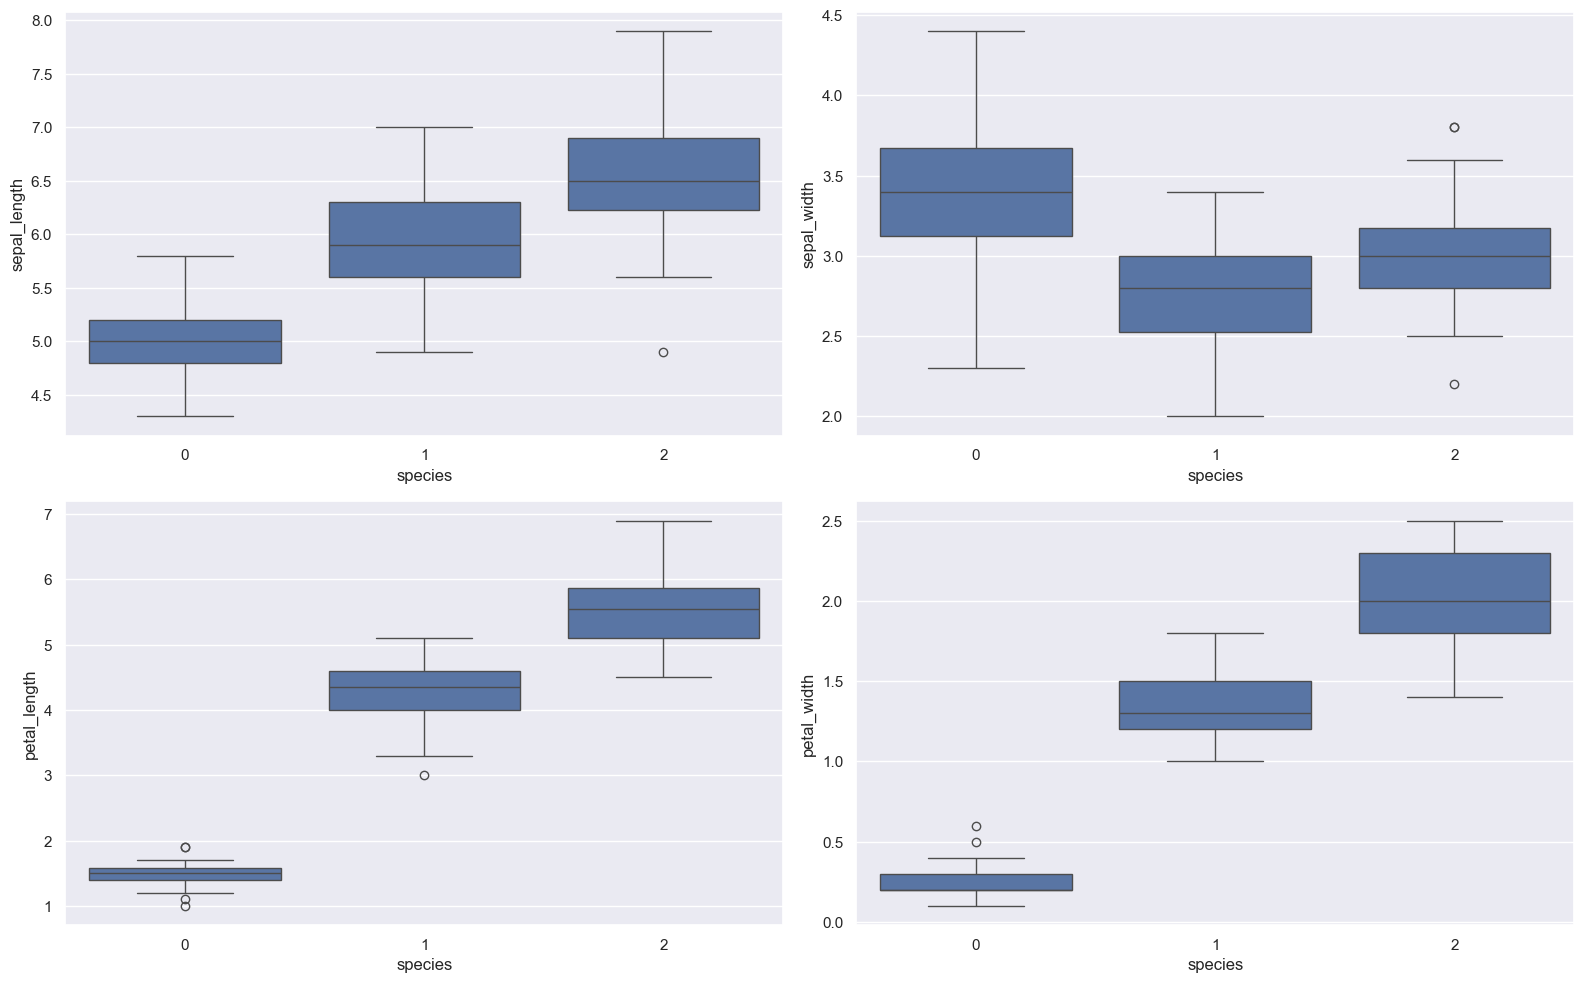

In [36]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data['species'], y = data[data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

c:\Users\kekop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


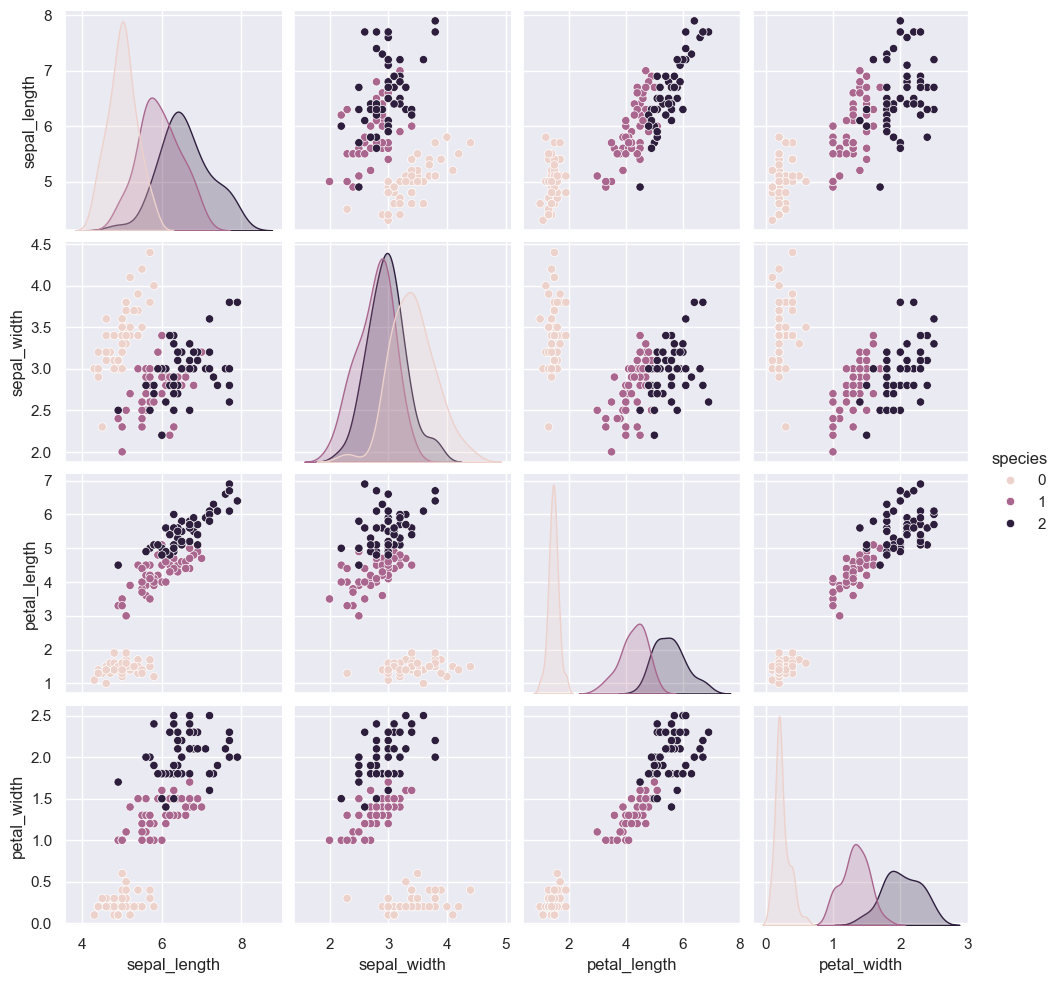

In [37]:
p=sns.pairplot(data, hue = 'species')

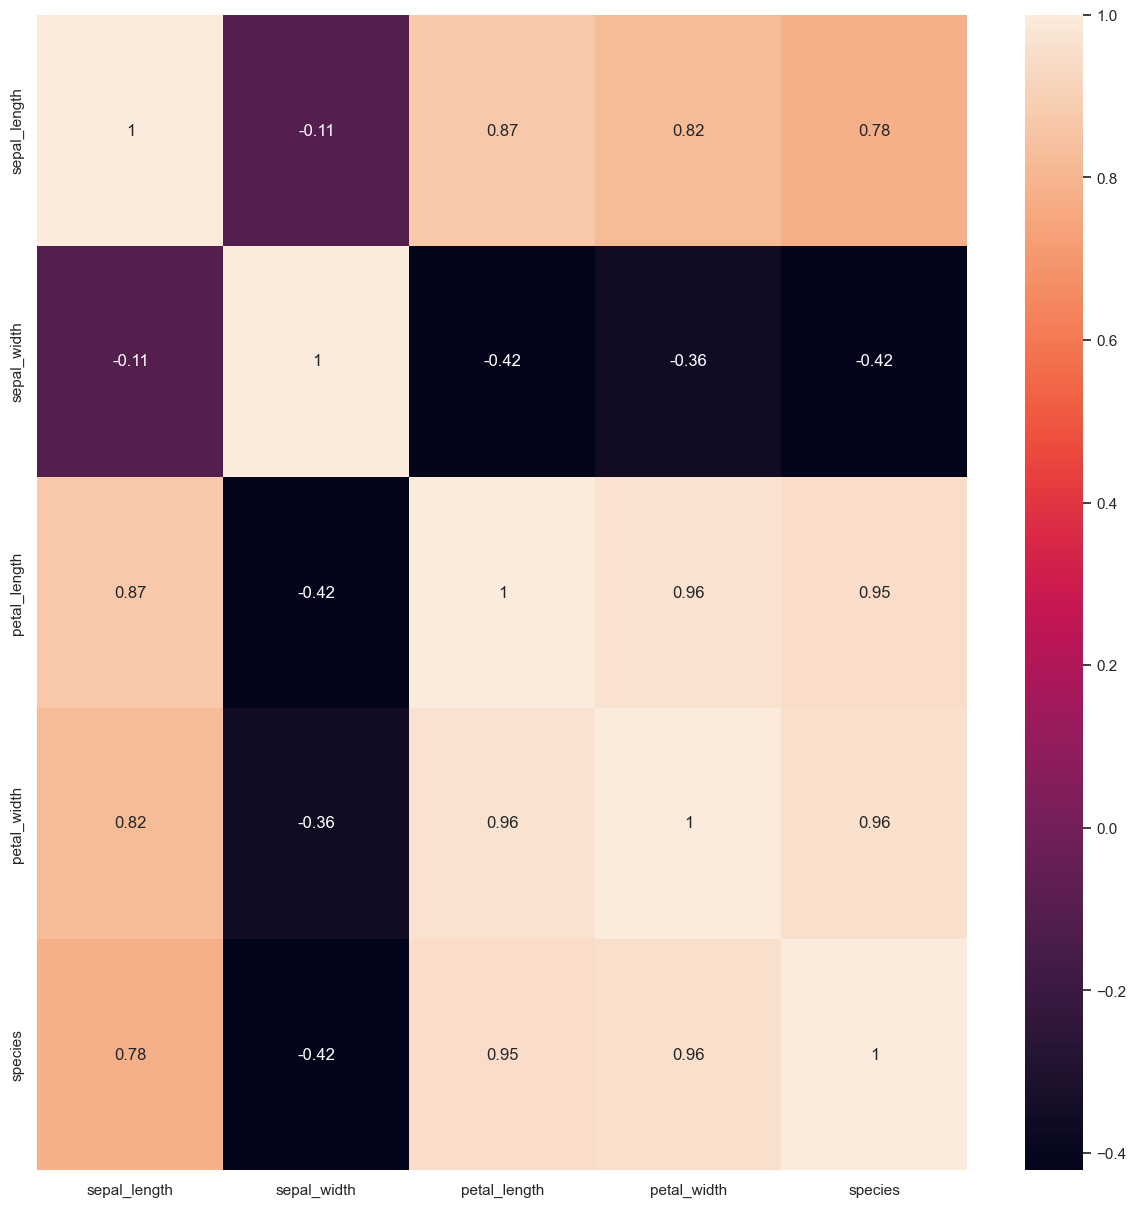

In [38]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True) 


Salah satu tujuan terbesar dari visualisasi dengan menggunakan berbagai jenis plot dan EDA semacam itu adalah untuk mengidentifikasi fitur-fitur yang kurang membantu dalam menjelaskan hasil target. Berdasarkan analisis di atas, fitur/variabel SepalWidthCm tampaknya kurang relevan dalam menjelaskan kelas target dibandingkan dengan fitur-fitur lainnya.

### Implementasi PCA

In [39]:
X = data.drop(['species'],axis=1)
y = data.species

In [40]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [41]:
pca.get_covariance()

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [42]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

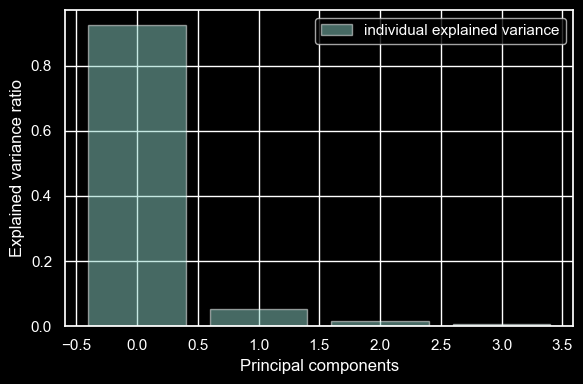

In [43]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [44]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [45]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [46]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


### Interpretasi dan Visualisasi

C:\Users\kekop\AppData\Local\Temp\ipykernel_2784\3116904412.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


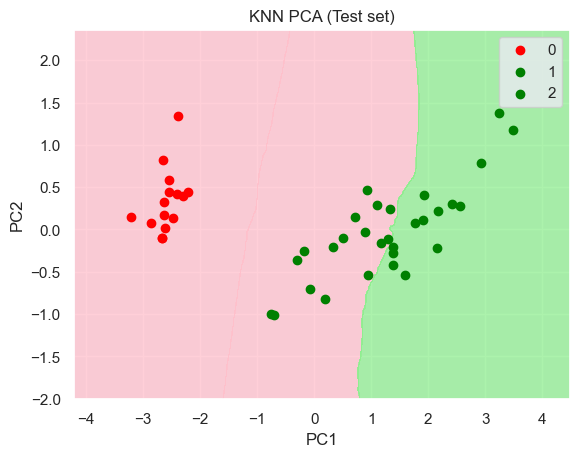

In [47]:
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Referensi : https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset